# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
#Criando as faixas 
faixas_lat = pd.cut(sinasc_raw['munResLat'], bins=[-np.inf, -10.5, np.inf], labels=['Abaixo de -10.5', 'Acima de -10.5'])
groupby_lat = sinasc_raw.groupby(faixas_lat)
resultado = groupby_lat.agg({
    'QTDPARTNOR': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDPARTCES': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})
resultado

QTDPARTNOR                                                  \
                       sum      mean  min   max median       std       var   
munResLat                                                                    
Abaixo de -10.5     5800.0  0.452242  0.0  41.0    0.0  1.123426  1.262087   
Acima de -10.5      8771.0  0.711759  0.0  40.0    0.0  1.279042  1.635949   

                QTDPARTCES                                                  
                       sum      mean  min   max median       std       var  
munResLat                                                                   
Abaixo de -10.5     7095.0  0.552570  0.0  12.0    0.0  0.753036  0.567062  
Acima de -10.5      6041.0  0.487335  0.0  12.0    0.0  0.737899  0.544495

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [5]:
faixas_area =pd.cut(sinasc_raw['munResArea'],bins=[-np.inf,3000,np.inf],labels=['Abaixo de 3000','Acima de 3000'])

groupby_area = sinasc_raw.groupby(faixas_area)

#Realizando as operações
resultado2 = groupby_area.agg({
    'QTDFILVIVO':['sum','mean','min','max','median','std','var'],
    'QTDFILMORT':['sum','mean','min','max','median','std','var'] 
})

resultado2

QTDFILVIVO                                                  \
                      sum      mean  min   max median       std       var   
munResArea                                                                  
Abaixo de 3000     4773.0  0.924284  0.0  30.0    1.0  1.075442  1.156575   
Acima de 3000     22053.0  1.086890  0.0  14.0    1.0  1.191750  1.420268   

               QTDFILMORT                                                  
                      sum      mean  min   max median       std       var  
munResArea                                                                 
Abaixo de 3000     1260.0  0.244803  0.0   4.0    0.0  0.551215  0.303838  
Acima de 3000      5383.0  0.272116  0.0  28.0    0.0  0.629081  0.395743

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
faixas = pd.cut(sinasc_raw['munResAlt'],bins = [-np.inf,200.00,np.inf],labels = ['Abaixo de 200.00','Acima de 200.00'])

#Aplicando o groupby nas faixas.
groupby_alt = sinasc_raw.groupby(faixas)

#Realizando as operações
resultado3 = groupby_alt.agg({
    'APGAR1':['sum','mean','min','max','median','std','var'],
    'APGAR5':['sum','mean','min','max','median','std','var']
})

resultado3

APGAR1                                                  \
                       sum      mean  min   max median       std       var   
munResAlt                                                                    
Abaixo de 200.00  168862.0  8.140282  0.0  10.0    8.0  0.989649  0.979404   
Acima de 200.00    50287.0  8.127849  0.0  10.0    8.0  0.968955  0.938874   

                    APGAR5                                                  
                       sum      mean  min   max median       std       var  
munResAlt                                                                   
Abaixo de 200.00  190725.0  9.196441  0.0  10.0    9.0  0.784460  0.615377  
Acima de 200.00    56414.0  9.121099  0.0  10.0    9.0  0.808099  0.653023

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [8]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [9]:
sinasc_raw['IMEDIATAS'] = sinasc_raw['munResNome'].map(imediatas)

sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

media_idade_por_regiao = sinasc_raw.groupby(['IMEDIATAS', 'DTNASC'])['IDADEMAE'].mean().reset_index()
media_idade_por_regiao

,IMEDIATAS,DTNASC,IDADEMAE
0,Ariquemes,2019-01-01,23.200000
1,Ariquemes,2019-01-02,26.166667
2,Ariquemes,2019-01-03,24.142857
3,Ariquemes,2019-01-04,24.666667
4,Ariquemes,2019-01-05,22.888889
...,...,...,...
2176,Vilhena,2019-12-27,27.000000
2177,Vilhena,2019-12-28,22.666667
2178,Vilhena,2019-12-29,24.250000
2179,Vilhena,2019-12-30,26.600000


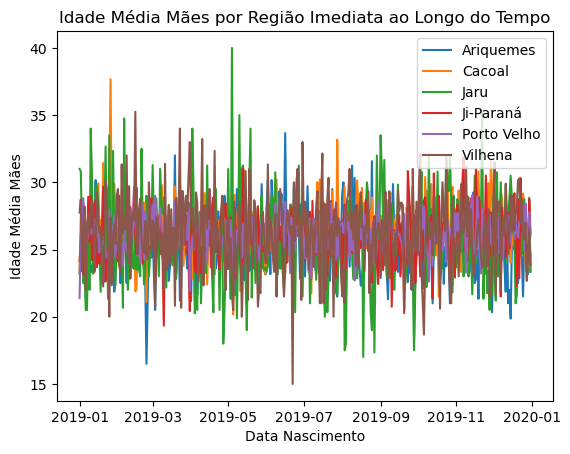

In [10]:
for regiao, dados in media_idade_por_regiao.groupby('IMEDIATAS'):
    plt.plot(dados['DTNASC'], dados['IDADEMAE'], label=regiao)

plt.xlabel('Data Nascimento')
plt.ylabel('Idade Média Mães')
plt.title('Idade Média Mães por Região Imediata ao Longo do Tempo')
plt.legend()

plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [11]:
IDH_renda = {
    "Porto Velho": 0.764,
    "Vilhena":0.734,
    "Cacoal":0.727,
    "Ji-Paraná":0.728,
    "Pimenta Bueno":0.726,
    "Ariquemes":0.716,
    "Rolim de Moura": 0.709,
    "Seringueiras":0.644,
    "Governador Jorge Teixeira":0.627,
    "Machadinho d'Oeste":0.629,
    "Campo Novo de Rondônia":0.667,
    "Alto Alegre dos Parecis":0.603,
    "Theobroma":0.622,
    "Nova União":0.608,
    "Nova Mamoré":0.619,
    "Vale do Anari":0.626
}
IDH_renda

{'Porto Velho': 0.764,
 'Vilhena': 0.734,
 'Cacoal': 0.727,
 'Ji-Paraná': 0.728,
 'Pimenta Bueno': 0.726,
 'Ariquemes': 0.716,
 'Rolim de Moura': 0.709,
 'Seringueiras': 0.644,
 'Governador Jorge Teixeira': 0.627,
 "Machadinho d'Oeste": 0.629,
 'Campo Novo de Rondônia': 0.667,
 'Alto Alegre dos Parecis': 0.603,
 'Theobroma': 0.622,
 'Nova União': 0.608,
 'Nova Mamoré': 0.619,
 'Vale do Anari': 0.626}

In [12]:
sinasc_raw['IDH_RENDA'] = sinasc_raw['munResNome'].map(IDH_renda)


In [13]:
#somente validando o map...
sinasc_raw[sinasc_raw['munResNome'] == 'Vale do Anari'].head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,IMEDIATAS,IDH_RENDA
174,1,2515504.0,110002,1,33,1.0,12 anos ou mais,231205.0,2.0,0.0,...,ATIVO,MUNIC,Vale do Anari,Rondônia,-9.85139,-62.17682,158.0,3135.106,Jaru,0.626
375,1,2515504.0,110002,1,24,5.0,12 anos ou mais,999992.0,1.0,0.0,...,ATIVO,MUNIC,Vale do Anari,Rondônia,-9.85139,-62.17682,158.0,3135.106,Jaru,0.626
506,1,2515520.0,110002,1,31,2.0,8 a 11 anos,521135.0,1.0,0.0,...,ATIVO,MUNIC,Vale do Anari,Rondônia,-9.85139,-62.17682,158.0,3135.106,Jaru,0.626
948,1,2515598.0,110002,1,30,2.0,12 anos ou mais,999992.0,2.0,0.0,...,ATIVO,MUNIC,Vale do Anari,Rondônia,-9.85139,-62.17682,158.0,3135.106,Jaru,0.626
3058,1,2808609.0,110011,1,20,5.0,8 a 11 anos,999992.0,1.0,0.0,...,ATIVO,MUNIC,Vale do Anari,Rondônia,-9.85139,-62.17682,158.0,3135.106,Jaru,0.626


In [14]:
faixas_idh = pd.cut(sinasc_raw['IDH_RENDA'], bins=[0.626,0.644,0.764], labels=['Renda Baixa', 'Renda Alta'])

In [15]:
sinasc_raw.groupby(faixas_idh,dropna=True)['IDADEMAE'].mean().reset_index()

,IDH_RENDA,IDADEMAE
0,Renda Baixa,24.707143
1,Renda Alta,26.266142


In [16]:
sinasc_raw.groupby(faixas_idh,dropna=True)['APGAR1'].mean().reset_index()

,IDH_RENDA,APGAR1
0,Renda Baixa,7.871429
1,Renda Alta,8.174272


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [17]:
IFDM = {
"Ariquemes":0.7746,
"Vilhena":0.7465,
"Pimenta Bueno":0.7383,
"Porto Velho":0.7257,
"Ji-Paraná":0.7117,
"Cacoal":0.7111,
"Santa Luzia d'Oeste":0.6850,
"Rolim de Moura":0.6785,
"Chupinguaia":0.6766,
"São Miguel do Guaporé":0.6699,
"Pimenteiras do Oeste":0.6501,
"Teixeirópolis":0.6500,
"Colorado do Oeste":0.6473,
"Jaru":0.6450,
"Rio Crespo":0.6430,
"Primavera de Rondônia":0.6384,
"Alta Floresta d'Oeste":0.6337,
"Ouro Preto do Oeste":0.6261,
"São Francisco do Guaporé":0.6214,
"Candeias do Jamari":0.6199,
"Buritis":0.6199,
"São Felipe d'Oeste":0.6153,
"Presidente Médici":0.6140,
"Cerejeiras":0.6137,
"Monte Negro":0.6016,
"Urupá":0.6006
}

In [18]:
sinasc_raw['IFDM'] = sinasc_raw['munResNome'].map(IFDM)


In [19]:
#somente validando o map...
sinasc_raw[sinasc_raw['munResNome'] == 'Urupá'].head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,IMEDIATAS,IDH_RENDA,IFDM
407,1,2494299.0,110002,1,29,2.0,12 anos ou mais,999992.0,0.0,1.0,...,MUNIC,Urupá,Rondônia,-11.12855,-62.37063,197.0,831.857,Ji-Paraná,NaN,0.6006
3581,1,2495279.0,110012,1,21,4.0,8 a 11 anos,622005.0,0.0,0.0,...,MUNIC,Urupá,Rondônia,-11.12855,-62.37063,197.0,831.857,Ji-Paraná,NaN,0.6006
3642,1,2495279.0,110012,1,29,5.0,8 a 11 anos,622005.0,4.0,1.0,...,MUNIC,Urupá,Rondônia,-11.12855,-62.37063,197.0,831.857,Ji-Paraná,NaN,0.6006
3702,1,2495279.0,110012,1,20,1.0,8 a 11 anos,999992.0,0.0,0.0,...,MUNIC,Urupá,Rondônia,-11.12855,-62.37063,197.0,831.857,Ji-Paraná,NaN,0.6006
3717,1,2495279.0,110012,1,40,5.0,12 anos ou mais,251510.0,0.0,0.0,...,MUNIC,Urupá,Rondônia,-11.12855,-62.37063,197.0,831.857,Ji-Paraná,NaN,0.6006


In [20]:
faixas_ifdm = pd.cut(sinasc_raw['IFDM'], bins=[0.6006,0.6450,0.7746], labels=['Moderado 1', 'Moderado 2'])

In [21]:
sinasc_raw.groupby(['munResNome',faixas_ifdm])['IFDM'].max().sort_values(ascending = False).head(10)

munResNome             IFDM      
Ariquemes              Moderado 2    0.7746
Vilhena                Moderado 2    0.7465
Pimenta Bueno          Moderado 2    0.7383
Porto Velho            Moderado 2    0.7257
Ji-Paraná              Moderado 2    0.7117
Cacoal                 Moderado 2    0.7111
Rolim de Moura         Moderado 2    0.6785
Chupinguaia            Moderado 2    0.6766
São Miguel do Guaporé  Moderado 2    0.6699
Pimenteiras do Oeste   Moderado 2    0.6501
Name: IFDM, dtype: float64

In [22]:
sinasc_raw.groupby('munResNome')['IFDM'].max().sort_values(ascending = False).head(10)

munResNome
Ariquemes                0.7746
Vilhena                  0.7465
Pimenta Bueno            0.7383
Porto Velho              0.7257
Ji-Paraná                0.7117
Cacoal                   0.7111
Rolim de Moura           0.6785
Chupinguaia              0.6766
São Miguel do Guaporé    0.6699
Pimenteiras do Oeste     0.6501
Name: IFDM, dtype: float64

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [23]:
PIB = {
"Porto Velho":17912070,
"Ji-Paraná": 3783972,
"Vilhena":2831175,
"Ariquemes": 2579830,
"Cacoal":2261644,
"Jaru":1500890,
"Rolim de Moura":1283434,
"Pimenta Bueno":1164877
}
PIB

{'Porto Velho': 17912070,
 'Ji-Paraná': 3783972,
 'Vilhena': 2831175,
 'Ariquemes': 2579830,
 'Cacoal': 2261644,
 'Jaru': 1500890,
 'Rolim de Moura': 1283434,
 'Pimenta Bueno': 1164877}

In [25]:
sinasc_raw['PIB'] = sinasc_raw['munResNome'].map(PIB)

In [26]:
#somente validando o map...
sinasc_raw[sinasc_raw['munResNome'] == 'Pimenta Bueno'].head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,IMEDIATAS,IDH_RENDA,IFDM,PIB
839,1,2494299.0,110002,1,19,2.0,4 a 7 anos,999992.0,1.0,0.0,...,Pimenta Bueno,Rondônia,-11.67754,-61.18367,186.0,6240.932,Cacoal,0.726,0.7383,1164877.0
1380,1,2496046.0,110004,1,19,1.0,4 a 7 anos,999992.0,1.0,0.0,...,Pimenta Bueno,Rondônia,-11.67754,-61.18367,186.0,6240.932,Cacoal,0.726,0.7383,1164877.0
1417,1,2496046.0,110004,1,26,2.0,4 a 7 anos,999992.0,2.0,0.0,...,Pimenta Bueno,Rondônia,-11.67754,-61.18367,186.0,6240.932,Cacoal,0.726,0.7383,1164877.0
1431,1,2496046.0,110004,1,31,1.0,8 a 11 anos,999994.0,2.0,0.0,...,Pimenta Bueno,Rondônia,-11.67754,-61.18367,186.0,6240.932,Cacoal,0.726,0.7383,1164877.0
1433,1,2496046.0,110004,1,38,1.0,12 anos ou mais,421125.0,0.0,1.0,...,Pimenta Bueno,Rondônia,-11.67754,-61.18367,186.0,6240.932,Cacoal,0.726,0.7383,1164877.0


In [27]:
sinasc_raw.groupby('munResNome')['PIB'].max().sort_values(ascending = False).head(8)

munResNome
Porto Velho       17912070.0
Ji-Paraná          3783972.0
Vilhena            2831175.0
Ariquemes          2579830.0
Cacoal             2261644.0
Jaru               1500890.0
Rolim de Moura     1283434.0
Pimenta Bueno      1164877.0
Name: PIB, dtype: float64

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Identifiquei que as cidades com as melhores colocações no IDH e IFDM, 
também estão nas melhores posições do PIB das cidades acima de 1Bilhão.
